In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('data.csv')

In [5]:
df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Austin,1/1/19,45.1,39.4,42.6,43.6,34.8,38.2,36.6,79.6,...,4.0,2,NaN,2019-01-01T07:27:35,2019-01-01T17:41:36,0.85,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
1,Austin,1/2/19,40.3,36.2,37.7,34.4,29.1,31.9,35.1,90.2,...,0.7,0,NaN,2019-01-02T07:27:48,2019-01-02T17:42:19,0.88,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
2,Austin,1/3/19,51.8,34.7,40.9,51.8,31.0,37.6,35.6,82.6,...,7.6,5,NaN,2019-01-03T07:28:00,2019-01-03T17:43:03,0.92,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,rain,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
3,Austin,1/4/19,65.9,32.5,46.2,65.9,29.1,45.1,32.9,64.8,...,12.4,6,NaN,2019-01-04T07:28:10,2019-01-04T17:43:48,0.95,Clear,Clear conditions throughout the day.,clear-day,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
4,Austin,1/5/19,73.7,37.5,52.3,73.7,36.2,52.2,35.5,58.6,...,12.7,6,NaN,2019-01-05T07:28:19,2019-01-05T17:44:34,0.00,Clear,Clear conditions throughout the day.,clear-day,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."


In [13]:
features = ['tempmax', 'tempmin', 'humidity', 'dew','precip']

In [15]:
new_df=df[features]

In [17]:
new_df

,tempmax,tempmin,humidity,dew,precip
0,45.1,39.4,79.6,36.6,0.001
1,40.3,36.2,90.2,35.1,2.275
2,51.8,34.7,82.6,35.6,0.242
3,65.9,32.5,64.8,32.9,0.000
4,73.7,37.5,58.6,35.5,0.000
...,...,...,...,...,...
1659,105.1,77.6,51.5,67.6,0.000
1660,103.8,77.6,54.3,69.3,0.000
1661,103.2,79.6,53.3,68.3,0.000
1662,101.6,76.4,52.9,66.0,0.000


In [25]:
new_df.shape

(1664, 5)

In [35]:
x = new_df.iloc[:, :4]

In [37]:
x

,tempmax,tempmin,humidity,dew
0,45.1,39.4,79.6,36.6
1,40.3,36.2,90.2,35.1
2,51.8,34.7,82.6,35.6
3,65.9,32.5,64.8,32.9
4,73.7,37.5,58.6,35.5
...,...,...,...,...
1659,105.1,77.6,51.5,67.6
1660,103.8,77.6,54.3,69.3
1661,103.2,79.6,53.3,68.3
1662,101.6,76.4,52.9,66.0


In [39]:
y= new_df.iloc[:, -1]

In [41]:
y

0       0.001
1       2.275
2       0.242
3       0.000
4       0.000
        ...  
1659    0.000
1660    0.000
1661    0.000
1662    0.000
1663    0.008
Name: precip, Length: 1664, dtype: float64

In [43]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [47]:
y_pred=model.predict(X_test)

In [49]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [51]:
print(mse)
print(rmse)
print(r2)

0.04974770851826499
0.22304194340586478
0.1661984442789477


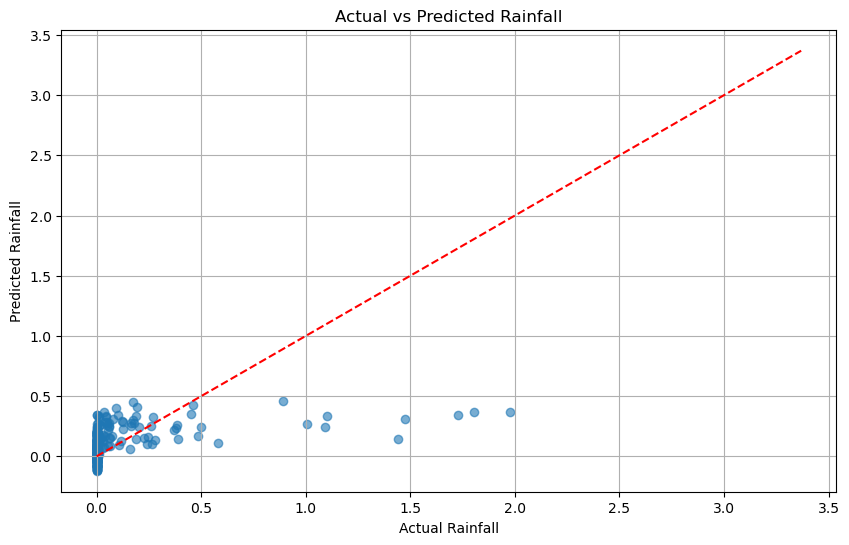

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Rainfall')
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.grid()
plt.show()

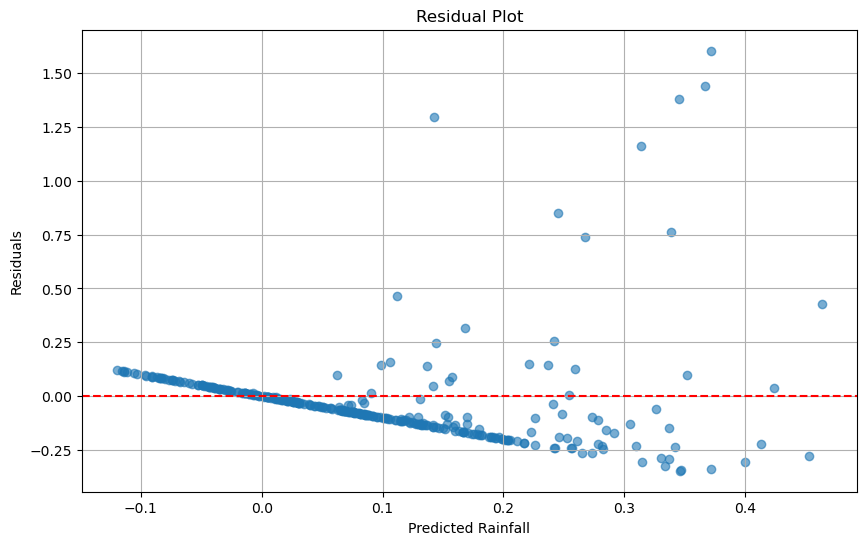

In [63]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Rainfall')
plt.ylabel('Residuals')
plt.grid()
plt.show()